In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# Read the CSV file
df = pd.read_csv('timestamp_matrix.csv')

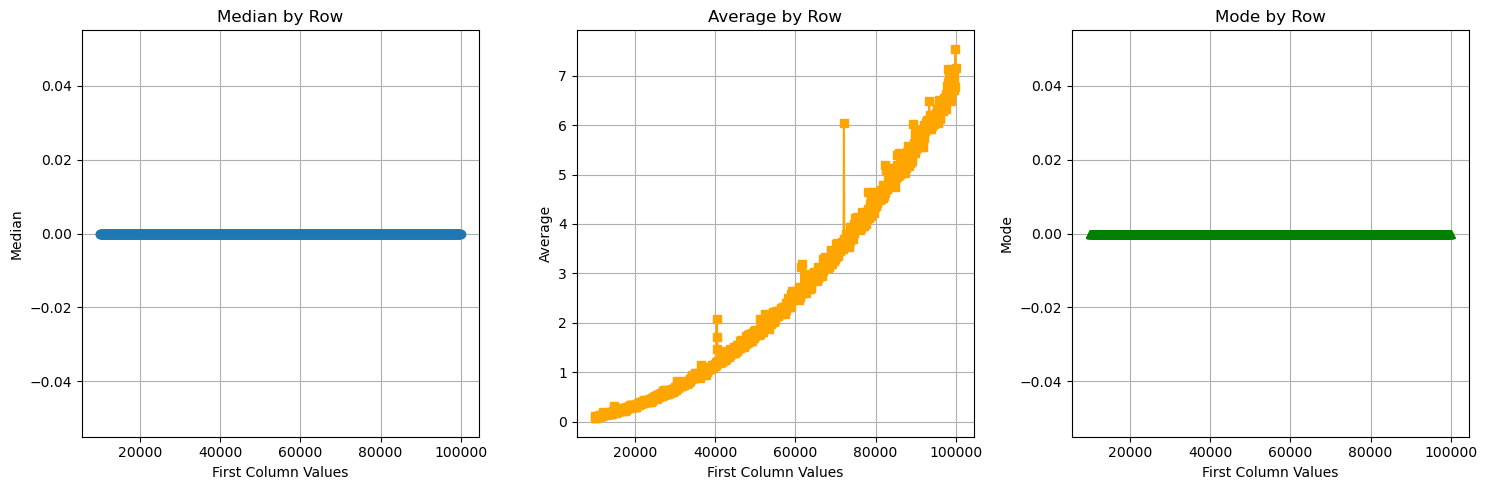

In [7]:
# Get the first column as x-axis values
x_values = df.iloc[1:, 0]# Skip first row for x-axis value

# Calculate statistics for each row (excluding the first column)
data_columns = df.iloc[1:, 1:] # All columns except the first

# Calculate median, mean, and mode for each row
medians = data_columns.median(axis=1)
averages = data_columns.mean(axis=1)

# Calculate mode for each row (most frequent value)
modes = []
for index, row in data_columns.iterrows():
    mode_result = stats.mode(row, keepdims=True)
    modes.append(mode_result.mode[0])

# Create three separate graphs
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Graph 1: Median
ax1.plot(x_values, medians, marker='o')
ax1.set_title('Median by Row')
ax1.set_xlabel('First Column Values')
ax1.set_ylabel('Median')
ax1.grid(True)

# Graph 2: Average
ax2.plot(x_values, averages, marker='s', color='orange')
ax2.set_title('Average by Row')
ax2.set_xlabel('First Column Values')
ax2.set_ylabel('Average')
ax2.grid(True)

# Graph 3: Mode
ax3.plot(x_values, modes, marker='^', color='green')
ax3.set_title('Mode by Row')
ax3.set_xlabel('First Column Values')
ax3.set_ylabel('Mode')
ax3.grid(True)

plt.tight_layout()
plt.show()

In [18]:
# Prepare data for CSV export with each tuple in a separate column
csv_data = []

# Find the maximum number of tuples in any row to determine how many columns we need
max_tuples = max(len(row_data['value_count_tuples']) for row_data in row_value_counts)

for row_data in row_value_counts:
    # Start with row index and first column value
    row_dict = {
        'Row_Index': row_data['row_index'],
        'First_Column_Value': row_data['first_column_value']
    }

    # Add each tuple as a separate column
    for i, (value, count) in enumerate(row_data['value_count_tuples']):
        row_dict[f'Tuple_{i+1}'] = f"({value},{count})"

    # Fill remaining columns with empty strings if this row has fewer tuples
    for i in range(len(row_data['value_count_tuples']), max_tuples):
        row_dict[f'Tuple_{i+1}'] = ""

    csv_data.append(row_dict)

# Create DataFrame and export to CSV
export_df = pd.DataFrame(csv_data)
export_df.to_csv('value_count_analysis.csv', index=False)

print("Data exported to 'value_count_analysis.csv'")
print(f"Exported {len(csv_data)} rows with {max_tuples} tuple columns")

Data exported to 'value_count_analysis.csv'
Exported 999 rows with 14 tuple columns


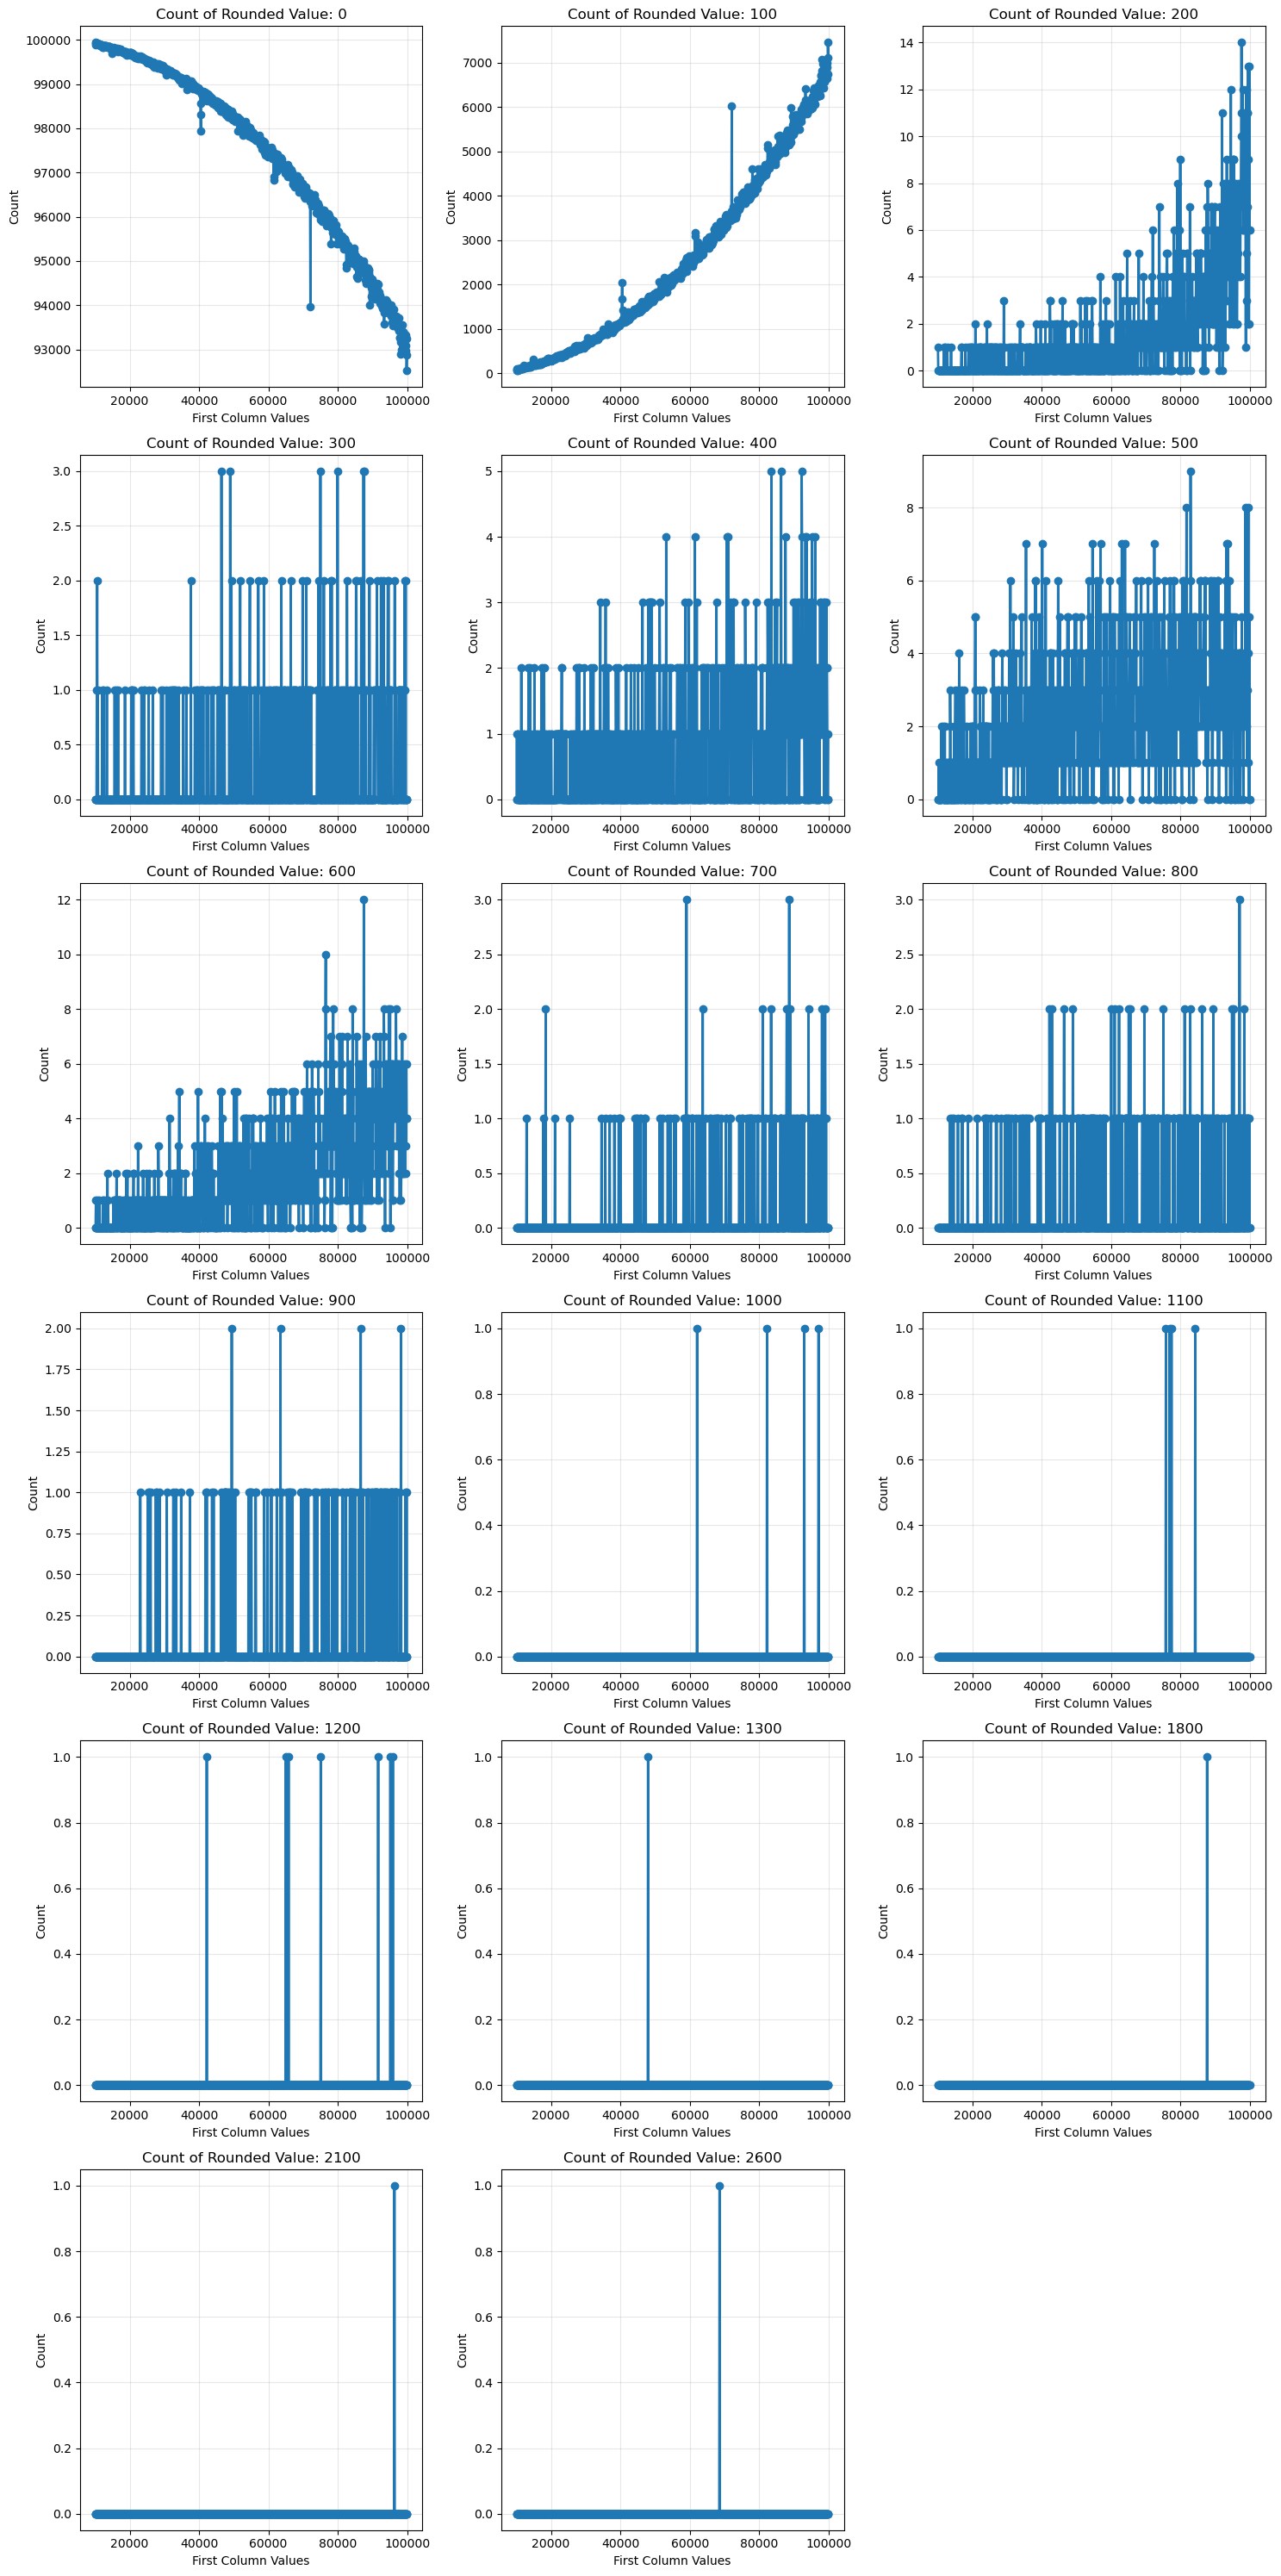

Created 17 graphs for unique rounded values: [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1800, 2100, 2600]


In [20]:
# Get all unique values across the entire matrix (rounded to nearest integer)
all_unique_values = set()
for row_data in row_value_counts:
    for value, count in row_data['value_count_tuples']:
        rounded_value = round(value)  # Round to nearest integer
        all_unique_values.add(rounded_value)

sorted_unique_values = sorted(all_unique_values)

# Calculate number of subplots needed
n_values = len(sorted_unique_values)
cols = 3  # Number of columns in subplot grid
rows = (n_values + cols - 1) // cols  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))

# Flatten axes array for easier indexing
if rows == 1:
    axes = [axes] if cols == 1 else axes
else:
    axes = axes.flatten()

# Create a graph for each unique rounded value
for i, unique_value in enumerate(sorted_unique_values):
    x_axis_values = []
    y_axis_counts = []

    # For each row, get the count of this specific rounded value
    for row_data in row_value_counts:
        first_col_value = row_data['first_column_value']

        # Sum counts for all values that round to this unique value
        total_count = 0
        for value, cnt in row_data['value_count_tuples']:
            if round(value) == unique_value:
                total_count += cnt

        x_axis_values.append(first_col_value)
        y_axis_counts.append(total_count)

    # Plot the graph
    axes[i].plot(x_axis_values, y_axis_counts, marker='o', linewidth=2, markersize=6)
    axes[i].set_title(f'Count of Rounded Value: {unique_value}')
    axes[i].set_xlabel('First Column Values')
    axes[i].set_ylabel('Count')
    axes[i].grid(True, alpha=0.3)

# Hide any unused subplots
for i in range(n_values, len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

print(f"Created {n_values} graphs for unique rounded values: {sorted_unique_values}")